# Import

In [2]:
import matplotlib
import pylab as plt
import numpy as np
import pandas as pd 
from numpy import random

In [3]:
# Read classification training data
train_clf =  pd.read_csv("../Data/Classification_train.csv")

In [4]:
x_train = train_clf.iloc[:,:-1]
x_train.head()

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (False),Abandoned (True),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,0.458249,-0.505436,-0.682012,-1.019400,0.0,1.0,-0.417717,-0.166186,0.857377,1.880498
1,-2.287868,1.504378,1.902788,2.959633,0.0,1.0,-0.417717,-0.166186,2.076895,2.533172
2,1.109461,-0.142490,-0.361780,0.000396,1.0,0.0,1.911171,-0.166186,-0.362141,0.120075
3,0.922252,0.288508,-0.286031,-0.583827,0.0,1.0,1.137771,1.349177,-2.801177,-0.717024
4,0.857360,-0.200561,0.214832,1.118341,0.0,1.0,0.659828,1.349177,0.857377,1.591885


In [5]:
y_train = train_clf.iloc[:,-1]
y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: Classification, dtype: int64

# Model Training

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Dummy Cassifier

In [7]:

#Baseline Perfromance/Guesswork
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')

In [8]:
dmy = DummyClassifier(random_state=42)
dmy.fit(x_train,y_train)

DummyClassifier(random_state=42)

In [9]:
dmy_acc=cross_val_score(dmy,x_train,y_train, cv=5, scoring="accuracy")
np.mean(dmy_acc)

0.5118465279267681

## Stochhastic Gradient Descent

In [10]:
from sklearn.linear_model import SGDClassifier

#Minimizes cost function by using one random training instance for each iteration

In [11]:
np.random.seed(42)
sgd_clf = SGDClassifier(random_state=42)
params = {'penalty': ['l1','l2','elasticnet'],
          'eta0': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
          'early_stopping':[True,False]}
sgd_search_cv = GridSearchCV(sgd_clf, params, cv=5,scoring="accuracy") 
sgd_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'early_stopping': [True, False],
                         'eta0': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                  0.9, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [12]:
params_sgd = sgd_search_cv.best_params_
params_sgd

{'early_stopping': True, 'eta0': 0.0, 'penalty': 'l1'}

In [13]:
sgd = SGDClassifier(penalty = params_sgd['penalty'], 
                    early_stopping = params_sgd['early_stopping'], 
                    eta0 = params_sgd['eta0'], 
                    random_state=42)
sgd.fit(x_train,y_train)

sgd_acc = cross_val_score(sgd,x_train,y_train, cv=5, scoring="accuracy")
sgd_acc = np.mean(sgd_acc)
sgd_acc

0.7758742759064579

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

#Uses z = 1/(1+(e^-z)) that gives values between 0 and 1. Usually, values below
#0.5 are said to belong to class 0 and values above 0.5 belong to class 1

In [15]:
np.random.seed(42)
log_reg_clf = LogisticRegression(random_state=42)
params = {'penalty': ['l1','l2','elasticnet','none'],
          'max_iter': [100,200,300,400,500,600,700,800,900,1000],
          'C':[1,1.5,2,2.5,3,4,5,6,7,8,9,10]}
log_reg_search_cv = GridSearchCV(log_reg_clf, params, cv=5,scoring="accuracy") 
log_reg_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [16]:
params_log_reg = log_reg_search_cv.best_params_
params_log_reg

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [17]:
log = LogisticRegression(penalty = params_log_reg['penalty'], 
                             max_iter=params_log_reg['max_iter'], 
                             C=params_log_reg['C'], 
                             random_state=42)
log.fit(x_train,y_train)

log_acc=cross_val_score(log,x_train,y_train, cv=5, scoring="accuracy")
log_acc = np.mean(log_acc)
log_acc

0.8113637988986626

## Support Vector Machine : Linear

In [18]:
from sklearn.svm import LinearSVC

#Draws a linear hyperplane between 2 data categories such that the margin between
#them is maximized. The data points that lie on the margins are called support vectors.

In [19]:
np.random.seed(42) 
svm_linear = LinearSVC(random_state=42)
params = {'C': [1,2,3,4,5,6,7,8,9,10],
          'loss': ['hinge','squared_hinge']}
svm_linear_search_cv = GridSearchCV(svm_linear, params, cv=5,scoring="accuracy") 
svm_linear_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'loss': ['hinge', 'squared_hinge']},
             scoring='accuracy')

In [20]:
params_svm_linear = svm_linear_search_cv.best_params_
params_svm_linear

{'C': 1, 'loss': 'hinge'}

In [21]:
linearsvc = LinearSVC(C = params_svm_linear['C'], 
                      loss = params_svm_linear['loss'], 
                      random_state=42)
linearsvc.fit(x_train,y_train)

linearsvc_acc=cross_val_score(linearsvc,x_train,y_train, cv=5, scoring="accuracy")
linearsvc_acc = np.mean(linearsvc_acc)
linearsvc_acc

0.8147393263248232

## Support Vector Machine : Polynomial

In [22]:
from sklearn.svm import SVC

#Draw a polynomial hyperplane instead of a linear one

In [23]:
np.random.seed(42)
svm = SVC(kernel = 'poly',random_state=42)
params = {'degree':[2,3,4,5],
          'coef0':[0.0,0.1,0.2,0.3,0.4,0.5],
          'C':[1,2,3,4,5,6,7,8,9,10]}
svm_search_cv = GridSearchCV(svm, params, cv=5,scoring="accuracy") 
svm_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=42),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'coef0': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'degree': [2, 3, 4, 5]},
             scoring='accuracy')

In [24]:
params_svm = svm_search_cv.best_params_
params_svm

{'C': 10, 'coef0': 0.0, 'degree': 2}

In [25]:
svc = SVC(kernel = 'poly', 
          degree = params_svm['degree'], 
          coef0 = params_svm['coef0'], 
          C = params_svm['C'],
          random_state = 42)
svc.fit(x_train,y_train)

svc_acc=cross_val_score(svc,x_train,y_train, cv=5, scoring="accuracy")
svc_acc = np.mean(svc_acc)
svc_acc

0.8553457770149467

## Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

#Splits data off a feature to create a tree of decisions

In [27]:
np.random.seed(42)
dtree = DecisionTreeClassifier(random_state = 42)    
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7,8,9,10],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,20]}
dtree_search_cv = GridSearchCV(dtree, params, cv=5,scoring="accuracy") 
dtree_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 20],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [28]:
params_dtree = dtree_search_cv.best_params_
params_dtree

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [29]:
dtree_clf = DecisionTreeClassifier(max_depth = params_dtree['max_depth'], 
                                  min_samples_leaf = params_dtree['min_samples_leaf'],
                                  min_samples_split = params_dtree['min_samples_split'], 
                                  random_state = 42)
dtree_clf.fit(x_train,y_train)

dtree_acc=cross_val_score(dtree_clf,x_train,y_train, cv=5, scoring="accuracy")
dtree_acc = np.mean(dtree_acc)
dtree_acc

0.8714152899949941

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

#Creates a decision tree but at each split choose a random feature from 
# m feature out of a total of p features

In [31]:
np.random.seed(42)
rand_for_clf = RandomForestClassifier(random_state = 42)    
params = {'max_depth':[1,2,3,4,5,6],
          'min_samples_split':[2,3,4,5,6],
          'n_estimators':[50,100,150,200,250,300],
          'bootstrap':[True,False]}
rand_for_clf_search_cv = RandomizedSearchCV(rand_for_clf, params,n_iter=150, cv=5,scoring="accuracy") 
rand_for_clf_search_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=150,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='accuracy')

In [32]:
params_rand_for_clf = rand_for_clf_search_cv.best_params_
params_rand_for_clf

{'n_estimators': 100,
 'min_samples_split': 6,
 'max_depth': 6,
 'bootstrap': True}

In [33]:
rnd_clf = RandomForestClassifier(max_depth = params_rand_for_clf['max_depth'], 
                                  n_estimators = params_rand_for_clf['n_estimators'],
                                  min_samples_split = params_rand_for_clf['min_samples_split'],
                                  bootstrap = params_rand_for_clf['bootstrap'],
                                  random_state = 42)
rnd_clf.fit(x_train,y_train)

rnd_clf_acc=cross_val_score(rnd_clf,x_train,y_train, cv=5, scoring="accuracy")
rnd_clf_acc = np.mean(rnd_clf_acc)
rnd_clf_acc


0.882417936065222

Lets rank the importance of each feature using Random Forest alogrithm

In [34]:
rnd_clf.feature_importances_

array([0.02335972, 0.01732552, 0.10329708, 0.09424054, 0.09456125,
       0.09537845, 0.01080791, 0.00190808, 0.13624994, 0.42287151])

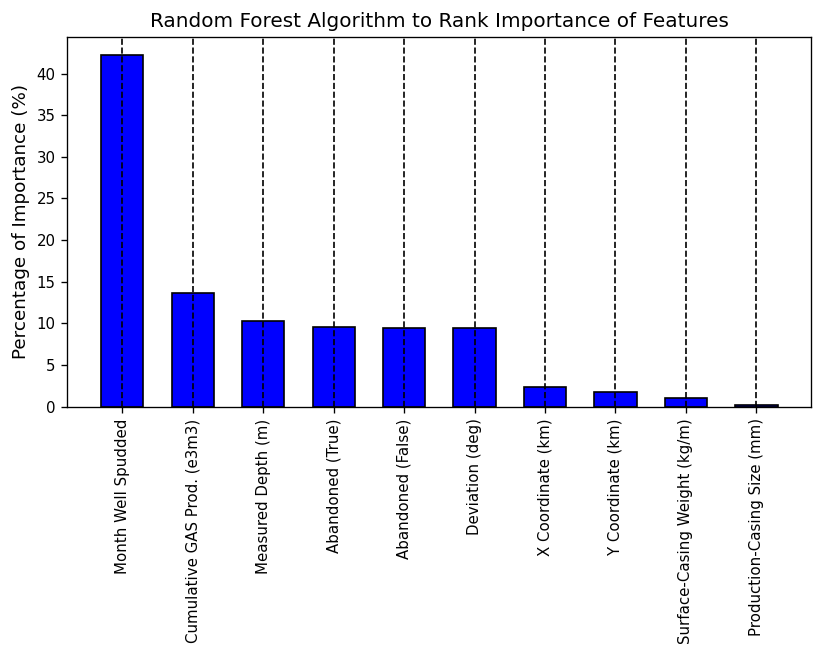

In [35]:
font = {'size'   : 9}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 120, facecolor='w', edgecolor='k')

col = ['X Coordinate (km)','Y Coordinate (km)', 'Measured Depth (m)',
       'Deviation (deg)','Abandoned (False)','Abandoned (True)',
       'Surface-Casing Weight (kg/m)','Production-Casing Size (mm)',
       'Cumulative GAS Prod. (e3m3)','Month Well Spudded']
train_prepared_df = pd.DataFrame(x_train, columns = col)
score=list((rnd_clf.feature_importances_*100))
sort_low_high=np.sort(score, axis=0)
sort_high_low=sort_low_high[::-1]
clmns=list(train_prepared_df.columns)
sort_colms=[]
for i in range(len(sort_high_low)):
    ind=score.index(sort_high_low[i])
    sort_colms.append(clmns[ind])
index = np.arange(len(sort_high_low))
ax1.bar(index, sort_high_low, align='center',width=0.6, alpha=1, ecolor='black',edgecolor ='k', capsize=4,color='b')
#ax1.set_xlabel('Features',fontsize=12)
ax1.set_ylabel('Percentage of Importance (%)',fontsize=11)
ax1.set_xticks(np.arange(len(sort_colms)))
ax1.set_xticklabels(sort_colms, rotation=90)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=1) 
plt.title('Random Forest Algorithm to Rank Importance of Features',fontsize=12)
plt.show()    

## Adaptive Boosting

In [36]:
from sklearn.ensemble import AdaBoostClassifier

#Adaptive Boosting corrects its predictor by paying more attention to the training instances that are underfitting the predecessor. 
#This leads to a new predictor for each run focusing on difficult instances.
#Adaptive Boosting requires a classifier such as SVM or Decision Trees.
#Then, it gives more weight to misclassified instances.
#This process is repeated for many times. Finally, ensemble is applied to make prediction.

### Support Vector Machines with Adaptive Boosting

In [37]:
linearsvc = LinearSVC(C = params_svm_linear['C'], 
                      loss = params_svm_linear['loss'], 
                      random_state=42)
linearsvc.fit(x_train,y_train)

ada_svm = AdaBoostClassifier(linearsvc,random_state=42)
params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.5,2,2.5,3,3.5,4,4.5,5],
          'algorithm':['SAMME', 'SAMME.R'],
          'n_estimators':list(range(50,150,25))}
ada_svm_search_cv = GridSearchCV(ada_svm, params, cv=5,scoring="accuracy") 
ada_svm_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=LinearSVC(C=1, loss='hinge',
                                                              random_state=42),
                                          random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1, 1.1, 1.5, 2, 2.5, 3,
                                           3.5, 4, 4.5, 5],
                         'n_estimators': [50, 75, 100, 125]},
             scoring='accuracy')

In [38]:
params_ada_svm = ada_svm_search_cv.best_params_
params_ada_svm

{'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 50}

In [39]:
ada_linearsvc = AdaBoostClassifier(linearsvc,
                                   learning_rate = params_ada_svm['learning_rate'], 
                                   n_estimators = params_ada_svm['n_estimators'],
                                   algorithm = params_ada_svm['algorithm'], 
                                  random_state = 42)
ada_linearsvc.fit(x_train,y_train)

ada_linearsvc_acc=cross_val_score(ada_linearsvc,x_train,y_train, cv=5, scoring="accuracy")
ada_linearsvc_acc = np.mean(ada_linearsvc_acc)
ada_linearsvc_acc

0.8079739683901881

### Decision Tree with Adaptive Boosting

In [40]:
dtree_clf = DecisionTreeClassifier(max_depth = params_dtree['max_depth'], 
                                  min_samples_leaf = params_dtree['min_samples_leaf'],
                                  min_samples_split = params_dtree['min_samples_split'], 
                                  random_state = 42)
dtree_clf.fit(x_train,y_train)

ada_tree = AdaBoostClassifier(dtree_clf,random_state=42)
params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
          'algorithm':['SAMME', 'SAMME.R'],
          'n_estimators':list(range(50,150,25))}
ada_tree_search_cv = GridSearchCV(ada_tree, params, cv=5,scoring="accuracy") 
ada_tree_search_cv.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                           min_samples_leaf=3,
                                                                           random_state=42),
                                          random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1],
                         'n_estimators': [50, 75, 100, 125]},
             scoring='accuracy')

In [41]:
params_ada_tree = ada_tree_search_cv.best_params_
params_ada_tree

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}

In [42]:
ada_dtree = AdaBoostClassifier( dtree_clf,
                                learning_rate = params_ada_svm['learning_rate'], 
                                n_estimators = params_ada_svm['n_estimators'],
                                algorithm = params_ada_svm['algorithm'], 
                                random_state = 42)
ada_dtree.fit(x_train,y_train)

ada_dtree_acc=cross_val_score(ada_dtree,x_train,y_train, cv=5, scoring="accuracy")
ada_dtree_acc = np.mean(ada_dtree_acc)
ada_dtree_acc

0.8595473074447544

## Hard Voting

In [43]:
from sklearn.ensemble import VotingClassifier

#Aggregates the predictions of each classifier and predicts the class that recieves the most votes

In [44]:
sgd = SGDClassifier(penalty = params_sgd['penalty'], 
                    early_stopping = params_sgd['early_stopping'], 
                    eta0 = params_sgd['eta0'], 
                    random_state=42)
log = LogisticRegression(penalty = params_log_reg['penalty'], 
                             max_iter=params_log_reg['max_iter'], 
                             C=params_log_reg['C'], 
                             random_state=42)
svc = SVC(kernel = 'poly', 
          degree = params_svm['degree'], 
          coef0 = params_svm['coef0'], 
          C = params_svm['C'],
          random_state = 42)
dtree_clf = DecisionTreeClassifier(max_depth = params_dtree['max_depth'], 
                                  min_samples_leaf = params_dtree['min_samples_leaf'],
                                  min_samples_split = params_dtree['min_samples_split'], 
                                  random_state = 42)
rnd_clf = RandomForestClassifier(max_depth = params_rand_for_clf['max_depth'], 
                                  n_estimators = params_rand_for_clf['n_estimators'],
                                  min_samples_split = params_rand_for_clf['min_samples_split'],
                                  bootstrap = params_rand_for_clf['bootstrap'],
                                  random_state = 42)
ada_dtree = AdaBoostClassifier( dtree_clf,
                                learning_rate = params_ada_svm['learning_rate'], 
                                n_estimators = params_ada_svm['n_estimators'],
                                algorithm = params_ada_svm['algorithm'], 
                                random_state = 42)


In [45]:
hard_voting = VotingClassifier(estimators=[('sgd',sgd),('log',log),('svc', svc),('tr', dtree_clf),('rf', rnd_clf),('ada',ada_dtree)],voting='hard')
hard_voting.fit(x_train,y_train)

VotingClassifier(estimators=[('sgd',
                              SGDClassifier(early_stopping=True, penalty='l1',
                                            random_state=42)),
                             ('log', LogisticRegression(C=1, random_state=42)),
                             ('svc',
                              SVC(C=10, degree=2, kernel='poly',
                                  random_state=42)),
                             ('tr',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=3,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=6,
                                                     min_samples_split=6,
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 estimator=DecisionTreeClassifier(max_depth=5,
                                                                                  min_samples_leaf=3,
                                                                                  random_state=42),
                                                 learning_rate=0.8,
                                                 random_state=42))])

In [46]:
clf=['Stochastic GD:','Logistic Regression:','SVM:','Decision Tree:', 'Random Forest:','Decision Tress w/ AB', 'Hard Voting:']
i=0
for clfier in (sgd,log,svc,dtree_clf,rnd_clf,ada_dtree,hard_voting):
    clfier.fit(x_train,y_train)
    cvs=cross_val_score(clfier,x_train,y_train, cv=5, scoring="accuracy")
    acc =np.mean(cvs)
    print(clf[i], acc)
    i+=1

Stochastic GD: 0.7758742759064579
Logistic Regression: 0.8113637988986626
SVM: 0.8553457770149467
Decision Tree: 0.8714152899949941
Random Forest: 0.882417936065222
Decision Tress w/ AB 0.8595473074447544
Hard Voting: 0.8748086962740471


## Soft Voting

In [47]:
#Predicts a class wih the highest probability by averaging over all individual classifiers

sgd = SGDClassifier(penalty = params_sgd['penalty'], 
                    early_stopping = params_sgd['early_stopping'], 
                    eta0 = params_sgd['eta0'], 
                    random_state=42)
log = LogisticRegression(penalty = params_log_reg['penalty'], 
                             max_iter=params_log_reg['max_iter'], 
                             C=params_log_reg['C'], 
                             random_state=42)
svc_soft = SVC(kernel = 'poly', 
          degree = params_svm['degree'], 
          coef0 = params_svm['coef0'], 
          C = params_svm['C'], probability = True,
               random_state = 42)
dtree_clf = DecisionTreeClassifier(max_depth = params_dtree['max_depth'], 
                                  min_samples_leaf = params_dtree['min_samples_leaf'],
                                  min_samples_split = params_dtree['min_samples_split'], 
                                  random_state = 42)
rnd_clf = RandomForestClassifier(max_depth = params_rand_for_clf['max_depth'], 
                                  n_estimators = params_rand_for_clf['n_estimators'],
                                  min_samples_split = params_rand_for_clf['min_samples_split'],
                                  bootstrap = params_rand_for_clf['bootstrap'],
                                  random_state = 42)
ada_dtree = AdaBoostClassifier( dtree_clf,
                                learning_rate = params_ada_svm['learning_rate'], 
                                n_estimators = params_ada_svm['n_estimators'],
                                algorithm = params_ada_svm['algorithm'], 
                                random_state = 42)


In [48]:
soft_voting = VotingClassifier(estimators=[('log',log),('svc', svc_soft),('tr', dtree_clf),('rf', rnd_clf),('ada',ada_dtree)],voting='soft')
soft_voting.fit(x_train,y_train)

VotingClassifier(estimators=[('log', LogisticRegression(C=1, random_state=42)),
                             ('svc',
                              SVC(C=10, degree=2, kernel='poly',
                                  probability=True, random_state=42)),
                             ('tr',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=3,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=6,
                                                     min_samples_split=6,
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 estimator=DecisionTreeClassifier(max_depth=5,
                                                                                  min_samples_leaf=3,
                                                                                  random_state=42),
                                                 learning_rate=0.8,
                                                 random_state=42))],
                 voting='soft')

In [49]:
clf=['Logistic Regression:','SVM:','Decision Tree:', 'Random Forest:','Decision Tress w/ AB', 'Soft Voting:']
i=0
for clfier in (log,svc_soft,dtree_clf,rnd_clf,ada_dtree,soft_voting):
    clfier.fit(x_train,y_train)
    cvs=cross_val_score(clfier,x_train,y_train, cv=5, scoring="accuracy")
    acc =np.mean(cvs)
    print(clf[i], acc)
    i+=1

Logistic Regression: 0.8113637988986626
SVM: 0.8553457770149467
Decision Tree: 0.8714152899949941
Random Forest: 0.882417936065222
Decision Tress w/ AB 0.8595473074447544
Soft Voting: 0.8773474933848245


##  K Nearest Neighbours

In [50]:
from sklearn.neighbors import KNeighborsClassifier

#Predicts class based on neigbouring points.

In [51]:
np.random.seed(42)
knn = KNeighborsClassifier() 
params = {'n_neighbors':list(range(0,50,5)),
         'weights':['uniform','distance'],
          'algorithm':['ball_tree', 'kd_tree', 'brute']
         }
knn_search_cv = GridSearchCV(knn, params, cv=5,scoring="accuracy") 
knn_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [52]:
params_knn = knn_search_cv.best_params_
params_knn

{'algorithm': 'ball_tree', 'n_neighbors': 30, 'weights': 'distance'}

In [53]:
knn_clf = KNeighborsClassifier(n_neighbors=params_knn['n_neighbors'],
                              algorithm = params_knn['algorithm'],
                              weights = params_knn['weights'])
knn_clf.fit(x_train,y_train)

knn_clf_acc=cross_val_score(knn_clf,x_train,y_train, cv=5, scoring="accuracy")
knn_clf_acc = np.mean(knn_clf_acc)
knn_clf_acc


0.8172673961238648

## Training Summary

In [54]:
dmy = DummyClassifier(random_state=42)

sgd = SGDClassifier(penalty = params_sgd['penalty'], 
                    early_stopping = params_sgd['early_stopping'], 
                    eta0 = params_sgd['eta0'], 
                    random_state=42)

log = LogisticRegression(penalty = params_log_reg['penalty'], 
                             max_iter=params_log_reg['max_iter'], 
                             C=params_log_reg['C'], 
                             random_state=42)

linearsvc = LinearSVC(C = params_svm_linear['C'], 
                      loss = params_svm_linear['loss'], 
                      random_state=42)

svc = SVC(kernel = 'poly', 
          degree = params_svm['degree'], 
          coef0 = params_svm['coef0'], 
          C = params_svm['C'],
          random_state = 42)

dtree_clf = DecisionTreeClassifier(max_depth = params_dtree['max_depth'], 
                                  min_samples_leaf = params_dtree['min_samples_leaf'],
                                  min_samples_split = params_dtree['min_samples_split'], 
                                  random_state = 42)

rnd_clf = RandomForestClassifier(max_depth = params_rand_for_clf['max_depth'], 
                                  n_estimators = params_rand_for_clf['n_estimators'],
                                  min_samples_split = params_rand_for_clf['min_samples_split'],
                                  bootstrap = params_rand_for_clf['bootstrap'],
                                  random_state = 42)

ada_linearsvc = AdaBoostClassifier(linearsvc,
                                   learning_rate = params_ada_svm['learning_rate'], 
                                   n_estimators = params_ada_svm['n_estimators'],
                                   algorithm = params_ada_svm['algorithm'], 
                                  random_state = 42)

ada_dtree = AdaBoostClassifier( dtree_clf,
                                learning_rate = params_ada_svm['learning_rate'], 
                                n_estimators = params_ada_svm['n_estimators'],
                                algorithm = params_ada_svm['algorithm'], 
                                random_state = 42)

hard_voting = VotingClassifier(estimators=[('sgd',sgd),('log',log),('svc', svc),
                                           ('tr', dtree_clf),('rf', rnd_clf),
                                           ('ada',ada_dtree)],voting='hard')

soft_voting = VotingClassifier(estimators=[('log',log),('svc', svc_soft),
                                           ('tr', dtree_clf),('rf', rnd_clf),
                                           ('ada',ada_dtree)],voting='soft')

knn_clf = KNeighborsClassifier(n_neighbors=params_knn['n_neighbors'],
                              algorithm = params_knn['algorithm'],
                              weights = params_knn['weights'])


In [63]:
clf=['Dummy Classifier:','Stocastic Gradient Descent:','Logistic Regression: ','SVM: Linear:',
     'SVM: Poly:', 'Decision Tree:','Random Forest:', 'Adaptive Boosting: SVM (linear):',
     'Adaptive Boosting: Decision Tree:', 'Hard Voting:', 'Soft Voting:', 'KNN:']
i=0
clf_acc=[]
for clfier in (dmy,sgd,log,linearsvc,svc,dtree_clf,rnd_clf,ada_linearsvc,ada_dtree,
               hard_voting, soft_voting,knn_clf):
    clfier.fit(x_train,y_train)
    cvs=cross_val_score(clfier,x_train,y_train,cv=5,scoring='accuracy')
    acc = np.mean(cvs)*100
    clf_acc.append(acc)
    print(clf[i], acc)
    i+=1

Dummy Classifier: 51.18465279267681
Stocastic Gradient Descent: 77.58742759064579
Logistic Regression:  81.13637988986626
SVM: Linear: 81.47393263248232
SVM: Poly: 85.53457770149467
Decision Tree: 87.1415289994994
Random Forest: 88.24179360652221
Adaptive Boosting: SVM (linear): 80.7973968390188
Adaptive Boosting: Decision Tree: 85.95473074447544
Hard Voting: 87.48086962740472
Soft Voting: 87.73474933848246
KNN: 81.72673961238648


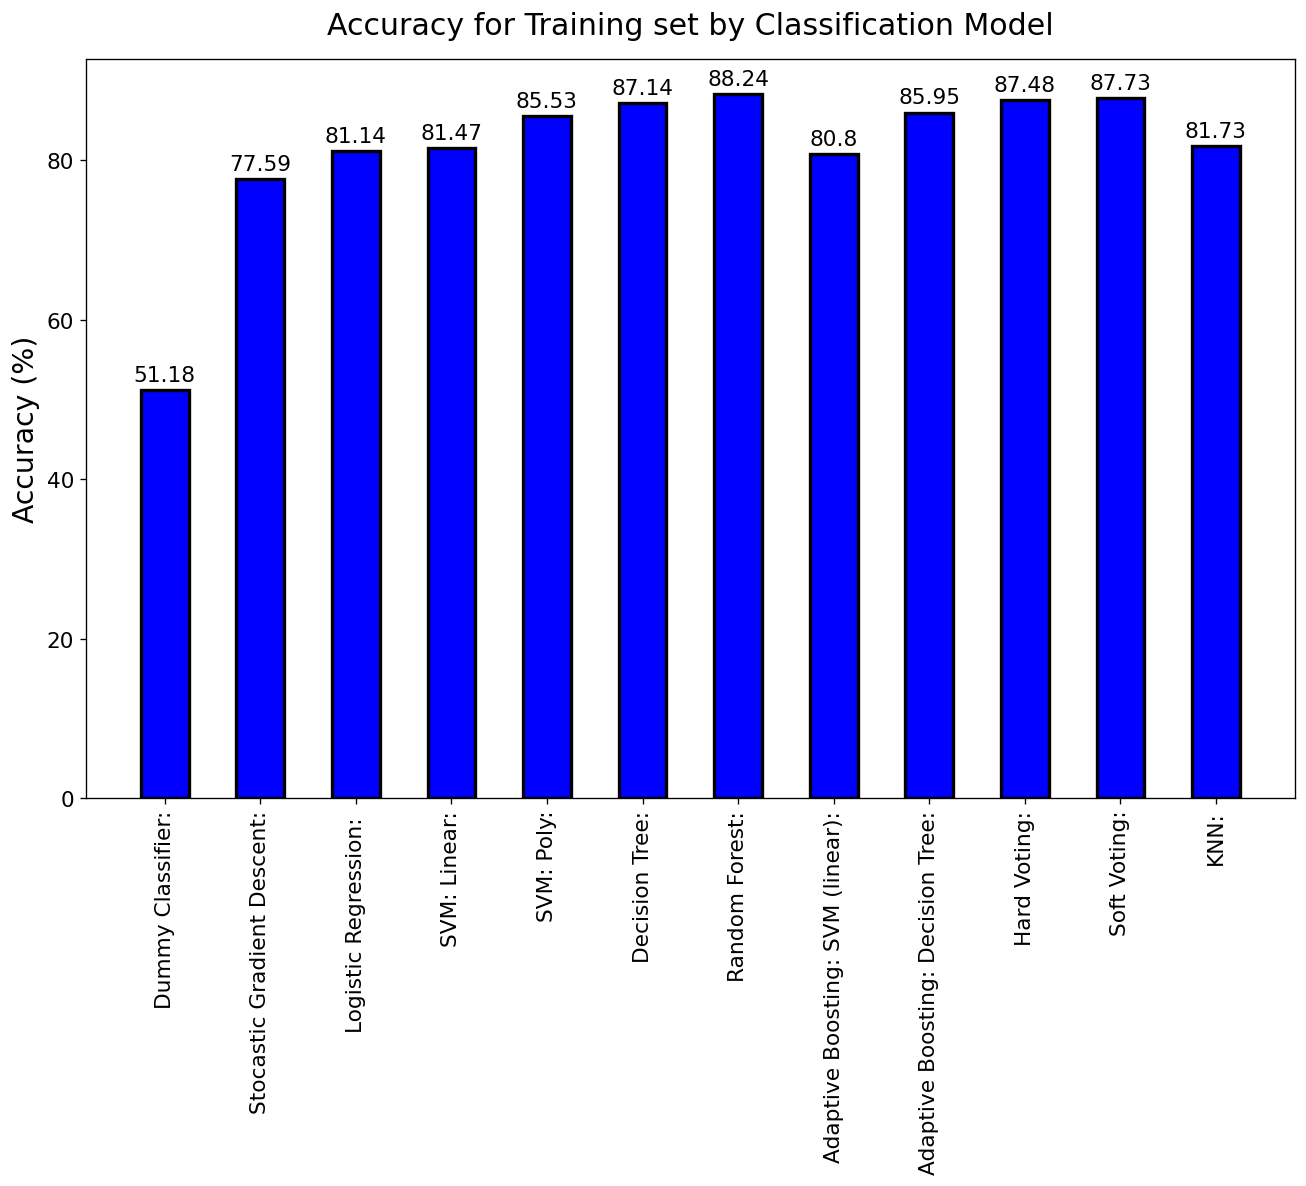

In [92]:
font = {'size'   :13}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(13, 8), dpi= 120, facecolor='w', edgecolor='k')

bars = ax1.bar(clf,clf_acc,lw=2, align='center',width=0.5, alpha=1, ecolor='black', edgecolor='k',capsize=1,color='b')
ax1.set_xticklabels(clf, rotation=90)     
plt.ylabel('Accuracy (%)',fontsize='17')

for bar in bars:
    height = np.round(bar.get_height(),2)
    ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom')

plt.title('Accuracy for Training set by Classification Model',fontsize='18',pad=15)
plt.show()

## Test Result

In [57]:
# Read classification test data
test_clf =  pd.read_csv("../Data/Classification_test.csv")
x_test = test_clf.iloc[:,:-1]
y_test = test_clf.iloc[:,-1]

In [77]:
from sklearn.metrics import accuracy_score

i=0
test_acc=[]
for clfier in (dmy,sgd,log,linearsvc,svc,dtree_clf,rnd_clf,ada_linearsvc,ada_dtree,
               hard_voting, soft_voting,knn_clf):
    clfier.fit(x_train,y_train)
    y_pred = clfier.predict(x_test)
    acc=accuracy_score(y_test, y_pred)*100
    test_acc.append(acc)
    print(clf[i], acc)
    i+=1

Dummy Classifier: 51.35135135135135
Stocastic Gradient Descent: 76.01351351351352
Logistic Regression:  78.04054054054053
SVM: Linear: 77.7027027027027
SVM: Poly: 81.75675675675676
Decision Tree: 83.78378378378379
Random Forest: 86.82432432432432
Adaptive Boosting: SVM (linear): 77.02702702702703
Adaptive Boosting: Decision Tree: 85.13513513513513
Hard Voting: 85.13513513513513
Soft Voting: 85.47297297297297
KNN: 80.74324324324324


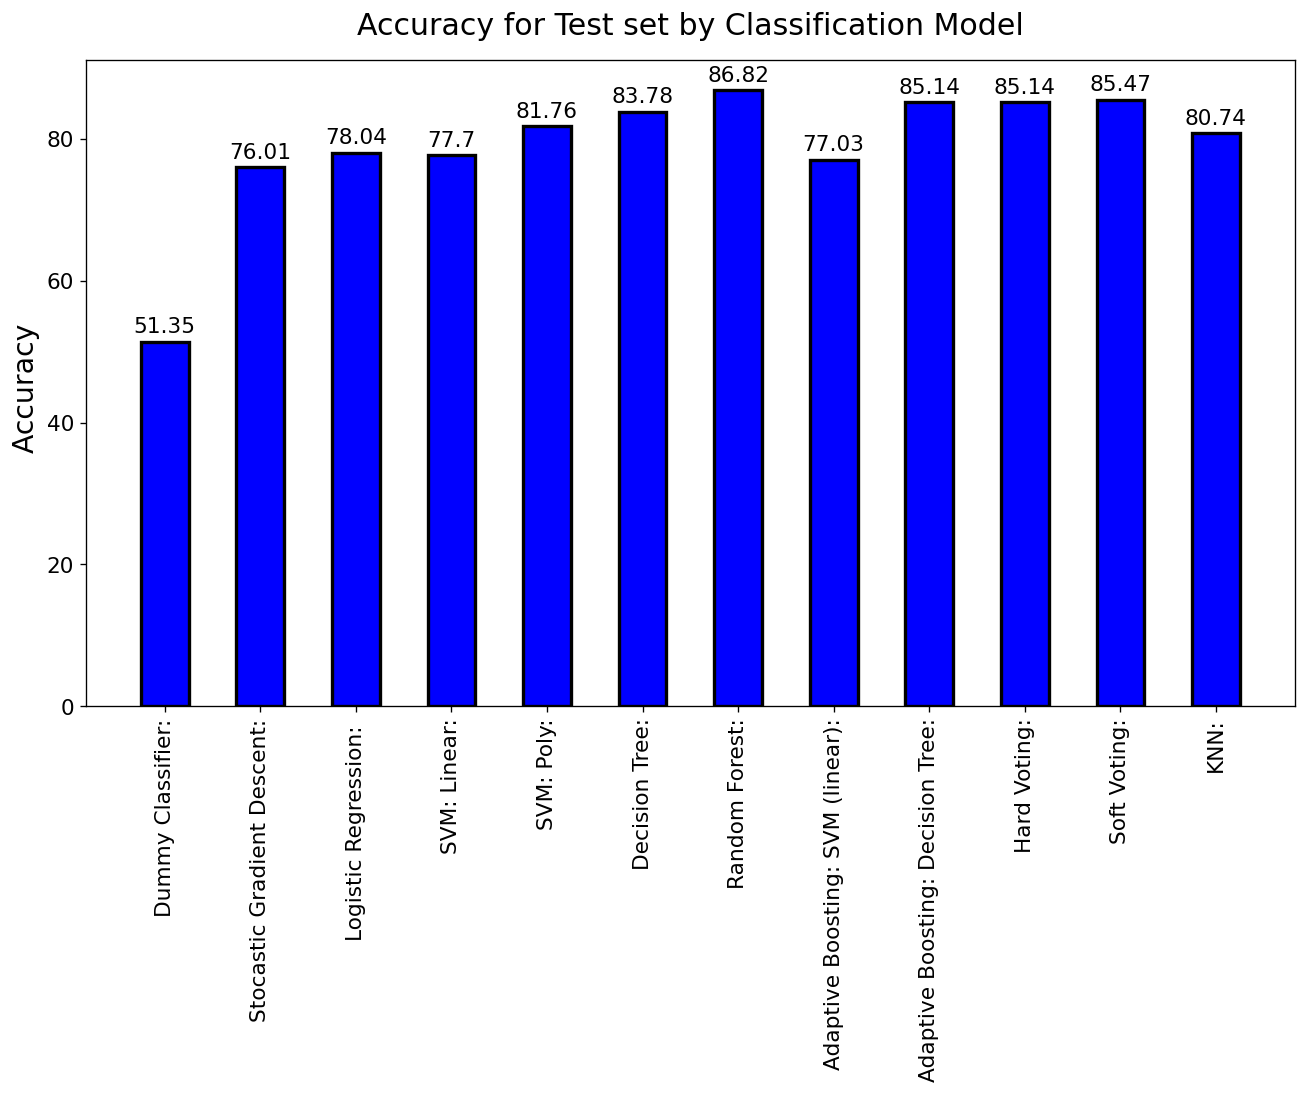

In [93]:
font = {'size'   :13}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(13, 7), dpi= 120, facecolor='w', edgecolor='k')

bars = ax1.bar(clf,test_acc,lw =2, align='center',width=0.5, alpha=1, ecolor='black', edgecolor='k',capsize=1,color='b')
ax1.set_xticklabels(clf, rotation=90)     
plt.ylabel('Accuracy ',fontsize='17')

for bar in bars:
    height = np.round(bar.get_height(),2)
    ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom')

plt.title('Accuracy for Test set by Classification Model',fontsize='18',pad=15)
plt.show()